# 作業
### 用 digits (dataset.load_digits()) 資料嘗試跑 t-SNE

In [43]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn import datasets, manifold
import matplotlib.patheffects as PathEffects
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context('notebook', font_scale=1.5,
                rc={'lines.linewidth': 2.5})

In [44]:
#### 代表 10 種數字
n_class=10
digits = datasets.load_digits( n_class = n_class ) 

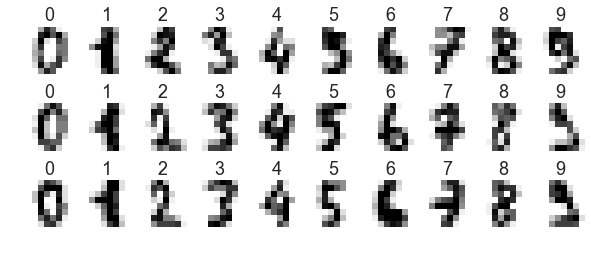

In [45]:
fig, axes = plt.subplots(3, 10, figsize=(10, 4))
for i, ax in enumerate(axes.ravel()):
    ax.imshow(digits.data[i].reshape(8, 8), cmap=plt.cm.binary)
    ax.axis('off')
    ax.set_title(digits.target[i])

In [46]:
###沿著垂直方向將數組堆疊起來
data = np.vstack([digits.data[digits.target==i] for i in range(n_class)])
###沿著水平方向將數組堆疊起來
target = np.hstack([digits.target[digits.target==i] for i in range(n_class)])

In [47]:
### 設定 tnse 參數
tsne_data = manifold.TSNE(n_components=2, random_state=0,
                    init='pca', learning_rate=200.,
                    early_exaggeration=12.).fit_transform(data)

In [60]:
def tnse_scatter_plt(data, n_class, colors):
    # choose a color palette with seaborn
    palette = np.array(sns.color_palette('hls', n_class))
    
    fig = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(data[:, 0], data[:, 1], lw=0, s=40,
                    c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
    
    txts=[] ### create an empty list for cordinate  storage
    
    for i in range(n_class):
        ## 定義 scatter plot中 數字顯示的座標位置
        xtxt, ytxt = np.median(data[colors==i, :], axis=0)
        txt = ax.text(xtxt, ytxt, str(i), fontsize=24)
        ### what is path effects ???
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground='w'),
            PathEffects.Normal()
        ])
        txts.append(txt)
    
    return fig, ax, sc, txts

(<Figure size 576x576 with 1 Axes>,
 [Text(1.8554249, 57.375473, '0'),
  Text(24.570522, -16.454132, '1'),
  Text(-40.01889, -27.801424, '2'),
  Text(-46.17137, 9.609807, '3'),
  Text(61.580418, -3.319459, '4'),
  Text(-19.423775, 1.3336809, '5'),
  Text(25.239895, 26.677267, '6'),
  Text(-0.05236595, -51.660866, '7'),
  Text(7.10526, -11.042862, '8'),
  Text(-24.056704, 25.321928, '9')])

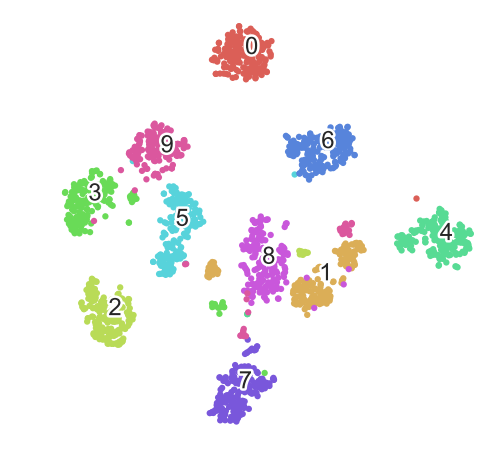

In [61]:
tnse_scatter_plt(tsne_data, n_class, target)